In [1]:
# Use this cell as the first notebook cell to add src/ folder to the PATH and enable import of the package.
# import sys,os
# sys.path.append(os.path.abspath("../src"))

In [2]:
#print(os.path.abspath("../src"))

In [6]:

!pip install torch torchvision torchaudio 
#--extra-index-url
#https://download.pytorch.org/whl/cpu



     |████████████████████████████████| 750.6 MB 15 kB/s  eta 0:00:013
     |████████████████████████████████| 21.0 MB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 2.9 MB 55.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install uq360

     |████████████████████████████████| 172 kB 680 kB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 387 kB/s eta 0:00:011
     |████████████████████████████████| 310 kB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 452 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 453 kB/s eta 0:00:01
     |████████████████████████████████| 363 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 537 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 713 kB 541 kB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 2.9 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38883 sha256=f1770f1de8b2f018

In [9]:
import ailab_active_learning

In [10]:
from ailab_active_learning.uq_regression import ActiveLearningRegression

In [11]:
alr = ActiveLearningRegression()
data = alr.read_data('/data/MGP/TestPoints_100k_NEW.xlsx',
                     'ResFeasible')

In [12]:
data_sel = alr.select_features_from_columns(data)
print(data_sel.head(2))

      Tin [K]    Pin [kPa]      N [rpm]  Total Consumed power   Pout [kPA]  \
0  322.017877  1867.320507  4220.190859            298.334466  2584.822359   
1  300.789449  2261.871734  2041.082876             60.837886  2475.185517   

   Qin [m3/s]  
0    0.099404  
1    0.049342  


/usr/local/lib/python3.8/dist-packages/ailab_active_learning/uq_regression.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff_Pressure'] = df['Pout [kPA]'] - df['Pin [kPa]']


In [13]:
no_samples = 15000
data_scaled, y_labels, x_data = alr.data_scaling(data_sel, no_samples)

In [14]:
from ailab_active_learning.Regressor import Data, Regressor, ALRegressor, BaselineRegressor, RegressionExperiment

In [15]:
data_al = Data()
data_al.set_data(x_data=x_data, y_data=y_labels)

In [16]:
config_hr, hr_kwargs, config_al = alr.config(data_al)
alregegre = ALRegressor()


In [17]:
re_al = RegressionExperiment(regressor=alregegre, x_data=x_data, y_data=y_labels, config_al=config_al)
xx = re_al.run_exp()
print("xx is :{}".format(xx))


Training model 0

Epoch: 0, loss = 0.6900098398327827
Epoch: 1, loss = 0.6297798231244087
Epoch: 2, loss = 0.5763267278671265
Epoch: 3, loss = 0.5264978818595409
Epoch: 4, loss = 0.4778805822134018
Epoch: 5, loss = 0.4291093535721302
Epoch: 6, loss = 0.3792320266366005
Epoch: 7, loss = 0.32721710205078125
Epoch: 8, loss = 0.2720448412001133
Epoch: 9, loss = 0.21332143992185593

Training model 1

Epoch: 0, loss = 0.7205189391970634
Epoch: 1, loss = 0.6760700717568398
Epoch: 2, loss = 0.6336546912789345
Epoch: 3, loss = 0.5917950719594955
Epoch: 4, loss = 0.5492900609970093
Epoch: 5, loss = 0.5050941184163094
Epoch: 6, loss = 0.45842183381319046
Epoch: 7, loss = 0.40870705991983414
Epoch: 8, loss = 0.3554152473807335
Epoch: 9, loss = 0.29809724912047386

Training model 2

Epoch: 0, loss = 0.7463112026453018
Epoch: 1, loss = 0.675407201051712
Epoch: 2, loss = 0.6157076880335808
Epoch: 3, loss = 0.5642448961734772
Epoch: 4, loss = 0.5155215859413147
Epoch: 5, loss = 0.46570125967264175
Ep

In [18]:
blregegre = BaselineRegressor()
re_bl = RegressionExperiment(regressor=blregegre, x_data=x_data, y_data=y_labels, config_al=config_al)
yy = re_bl.run_exp()


Training model 0

Epoch: 0, loss = 0.8183656136194866
Epoch: 1, loss = 0.7646834949652355
Epoch: 2, loss = 0.7138570000727972
Epoch: 3, loss = 0.6610143532355627
Epoch: 4, loss = 0.6039798756440481
Epoch: 5, loss = 0.5403289571404457
Epoch: 6, loss = 0.46841879189014446
Epoch: 7, loss = 0.38682224974036217
Epoch: 8, loss = 0.29388865083456045
Epoch: 9, loss = 0.1884552662571271

Training model 1

Epoch: 0, loss = 0.7641843557357788
Epoch: 1, loss = 0.6817546784877777
Epoch: 2, loss = 0.6102657268444698
Epoch: 3, loss = 0.536622221271197
Epoch: 4, loss = 0.4592393065492313
Epoch: 5, loss = 0.37618664403756463
Epoch: 6, loss = 0.2855764453609785
Epoch: 7, loss = 0.18582022252182168
Epoch: 8, loss = 0.07562972807014981
Epoch: 9, loss = -0.04634533915668726

Training model 2

Epoch: 0, loss = 0.7983540048201879
Epoch: 1, loss = 0.750200092792511
Epoch: 2, loss = 0.7003947496414186
Epoch: 3, loss = 0.6467303683360417
Epoch: 4, loss = 0.5875769307216008
Epoch: 5, loss = 0.5210975830753645
E

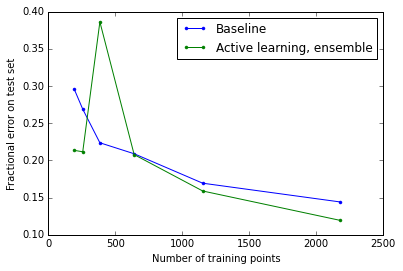

In [19]:
alr.compare_err_plot(frac_err_baseline=yy, frac_err_al_ens=xx)
